In [22]:
import pandas as pd
import numpy as np
data=pd.read_csv('data/heart_disease_dataset.csv')
df=pd.DataFrame(data)
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [23]:
#checking missing values
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [24]:
df=df.dropna()

In [25]:
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, 0 to 997
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      660 non-null    int64 
 1   Gender                   660 non-null    object
 2   Cholesterol              660 non-null    int64 
 3   Blood Pressure           660 non-null    int64 
 4   Heart Rate               660 non-null    int64 
 5   Smoking                  660 non-null    object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           660 non-null    int64 
 8   Family History           660 non-null    object
 9   Diabetes                 660 non-null    object
 10  Obesity                  660 non-null    object
 11  Stress Level             660 non-null    int64 
 12  Blood Sugar              660 non-null    int64 
 13  Exercise Induced Angina  660 non-null    object
 14  Chest Pain Type          660 non-null    object

In [27]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [28]:
#checking data balanced or not
df['Heart Disease'].value_counts()

Heart Disease
0    398
1    262
Name: count, dtype: int64

In [29]:
#balancing data
df_minority=df[df['Heart Disease']==1]
df_majority=df[df['Heart Disease']==0]

In [30]:
#up_sampling
from sklearn.utils import resample
df_minority_upsample=resample(df_minority,replace=True,#sample with replacement
                             n_samples=len(df_majority)# to match the majority class
                             ,random_state=42)

In [31]:
df_minority_upsample['Heart Disease'].value_counts()

Heart Disease
1    398
Name: count, dtype: int64

In [32]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [33]:
df=df_upsampled #assigning df_upsampled to df
df['Heart Disease'].value_counts()

Heart Disease
0    398
1    398
Name: count, dtype: int64

In [34]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,54.762563,255.747487,135.899497,79.298995,4.383166,5.650754,136.654523,0.500000
std,15.597860,57.399562,26.594035,11.720693,2.899606,2.786966,36.423746,0.500314
min,25.000000,150.000000,90.000000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,42.000000,208.000000,113.000000,70.000000,2.000000,3.000000,105.750000,0.000000
50%,56.000000,257.000000,136.000000,79.000000,4.000000,6.000000,138.000000,0.500000
75%,68.000000,305.000000,159.000000,89.250000,7.000000,8.000000,167.250000,1.000000
max,79.000000,349.000000,179.000000,99.000000,9.000000,10.000000,199.000000,1.000000


In [35]:
#separating numerical features and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
numerical_features,categorical_features

(['Age',
  'Cholesterol',
  'Blood Pressure',
  'Heart Rate',
  'Exercise Hours',
  'Stress Level',
  'Blood Sugar',
  'Heart Disease'],
 ['Gender',
  'Smoking',
  'Alcohol Intake',
  'Family History',
  'Diabetes',
  'Obesity',
  'Exercise Induced Angina',
  'Chest Pain Type'])

<Axes: >

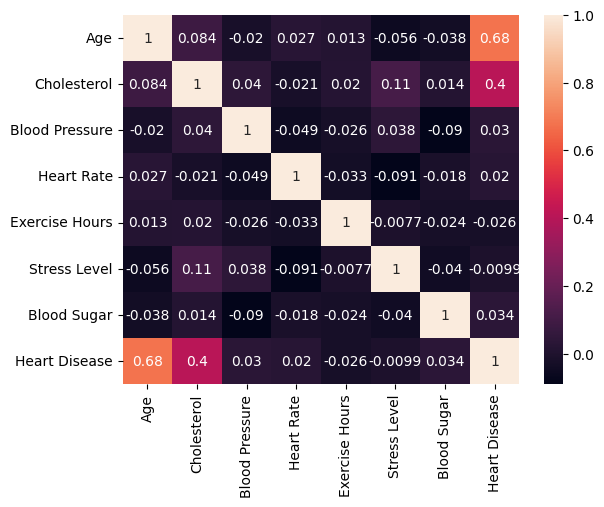

In [36]:
import seaborn as sns
sns.heatmap(df[numerical_features].corr(),annot=True)

In [40]:
from ydata_profiling import ProfileReport

# Assuming df is your DataFrame
profile = ProfileReport(df.reset_index(), title="Data Profiling Report", correlations={"auto": {"calculate": False}})

profile.to_widgets()

        
        

ModuleNotFoundError: No module named 'ydata_profiling'

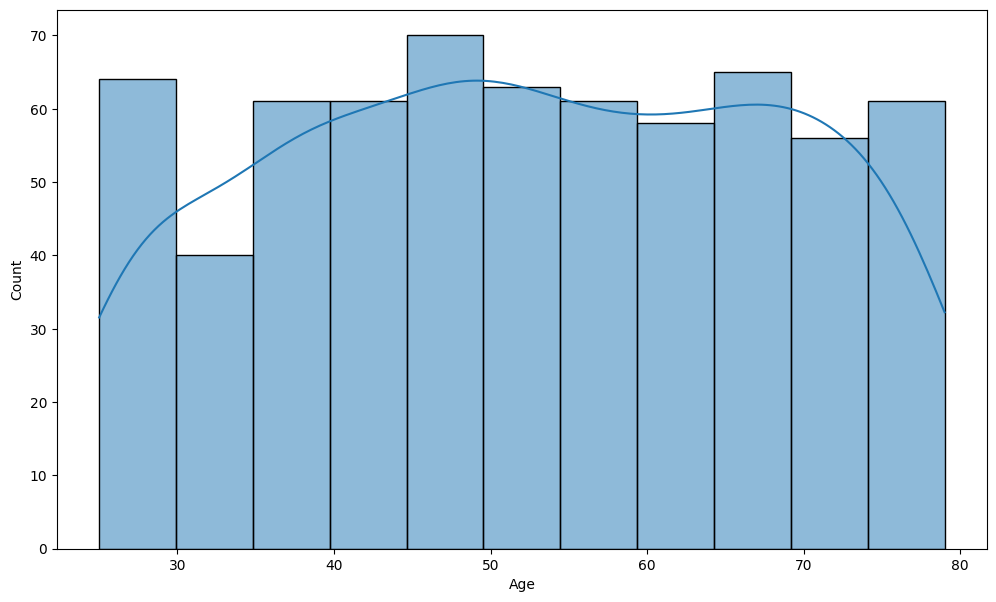

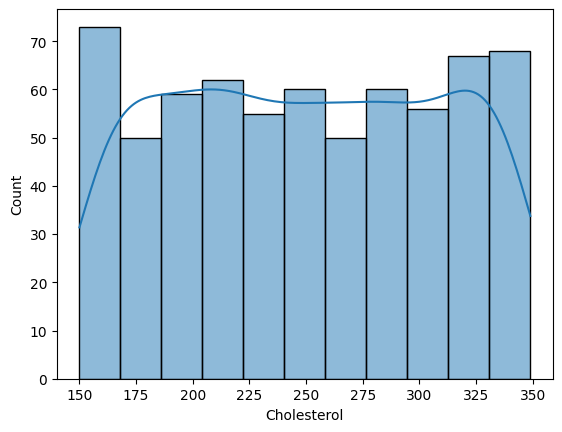

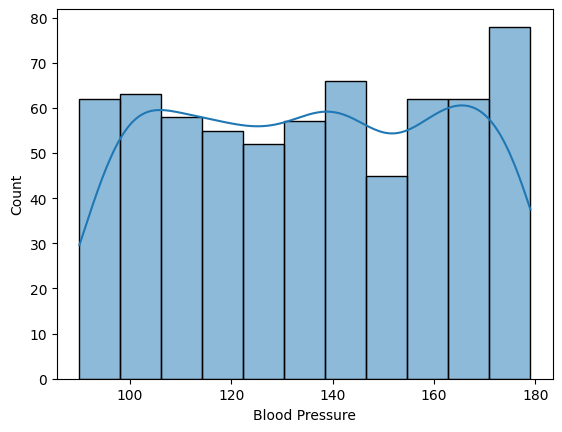

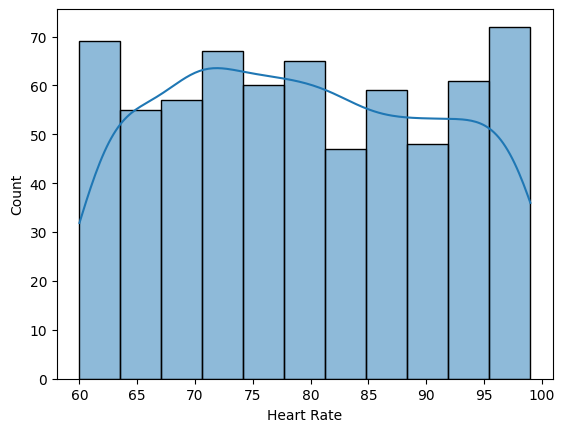

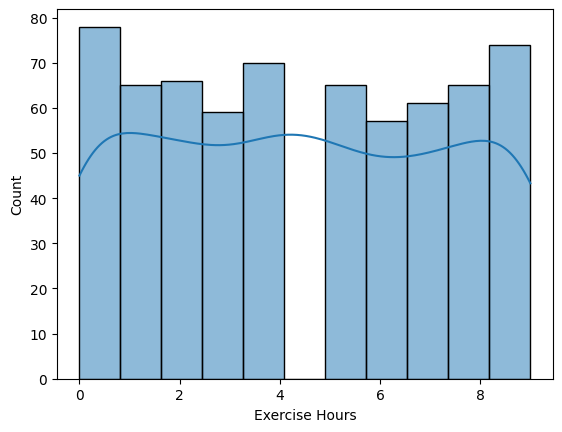

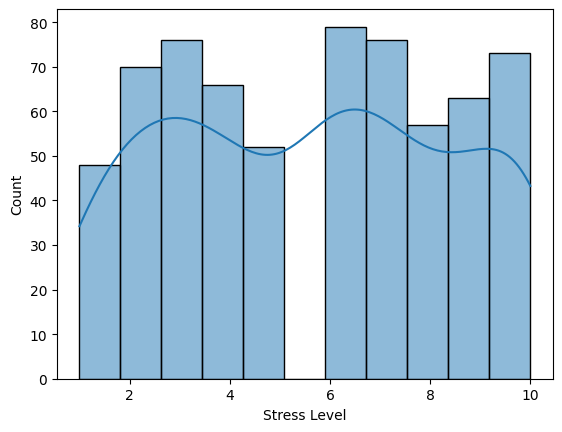

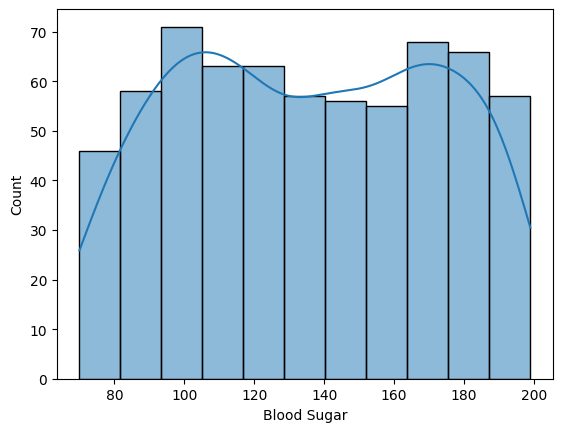

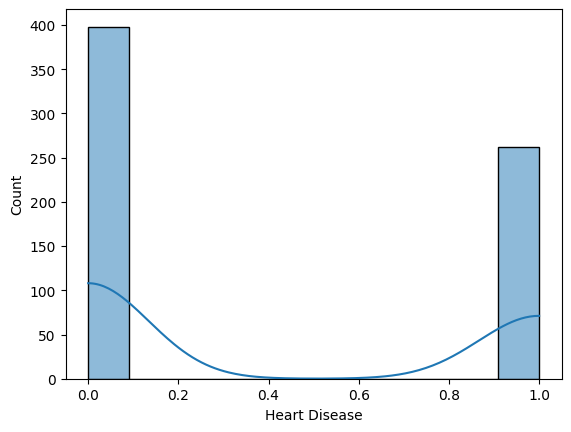

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
for i in numerical_features:
    sns.histplot(x=i,data=df,kde=True)
    plt.show()

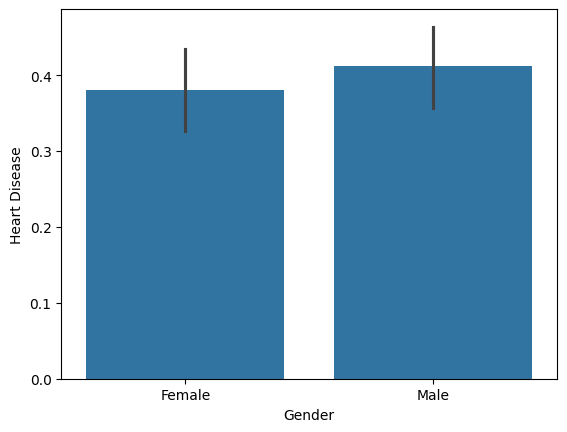

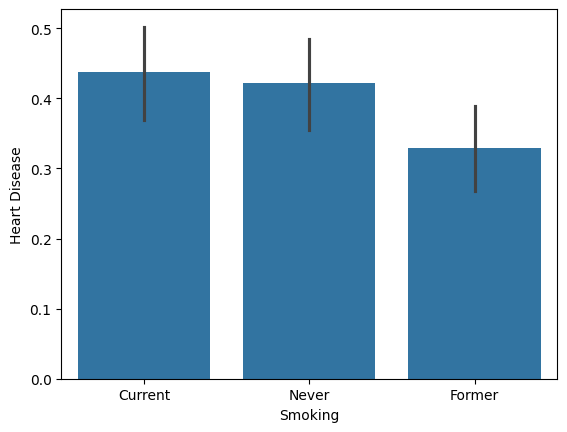

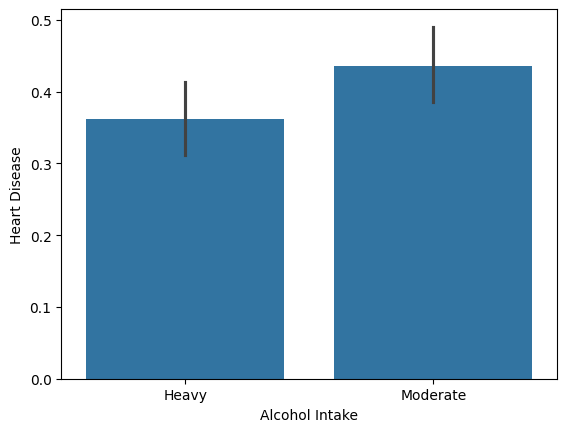

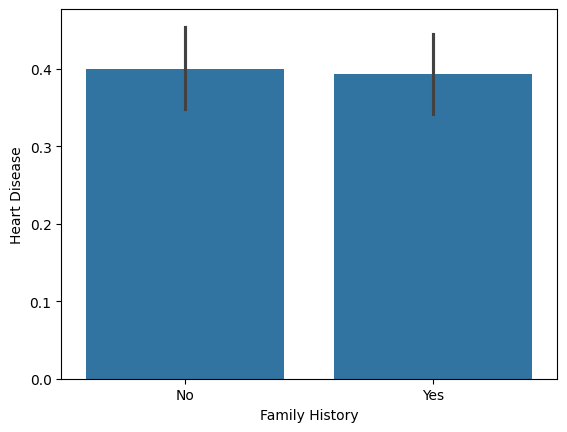

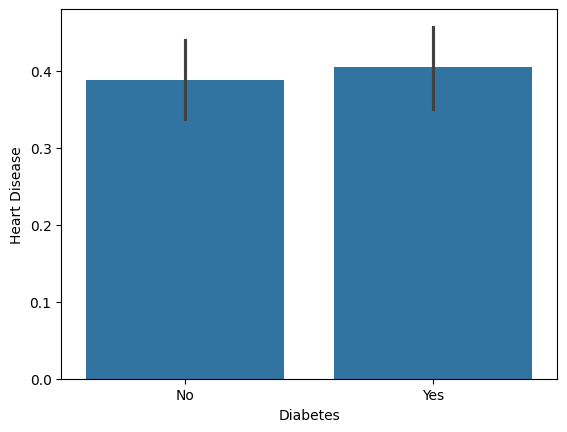

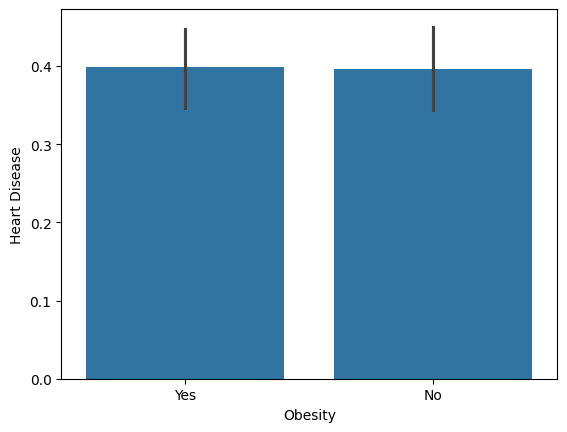

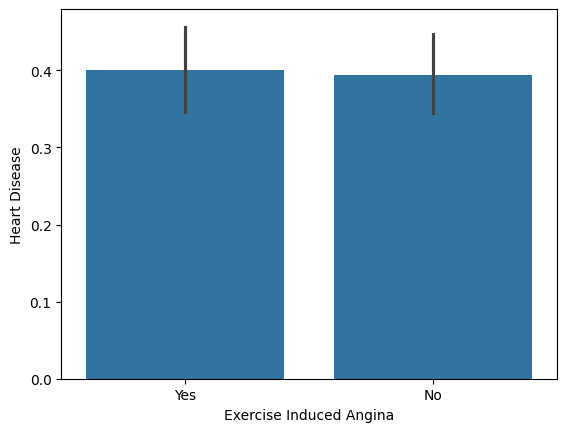

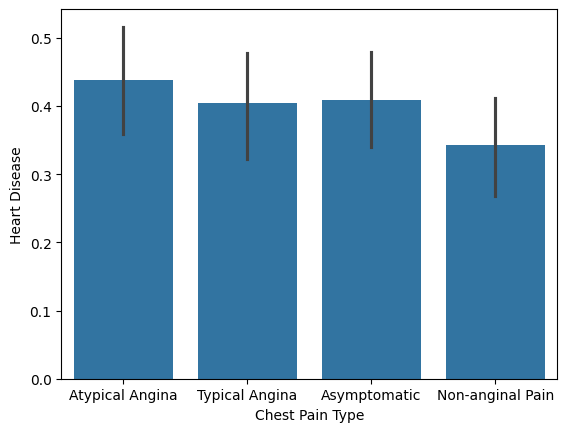

In [ ]:
for i in categorical_features:
    sns.barplot(x=i,y='Heart Disease',data=df)
    plt.show()

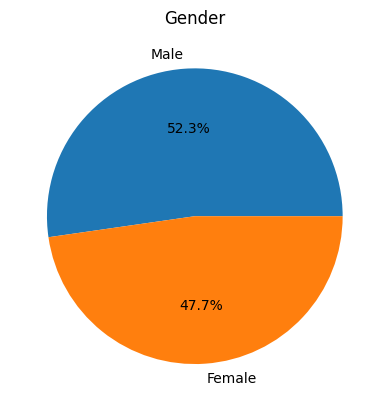

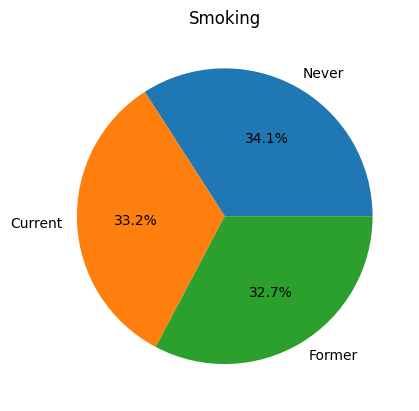

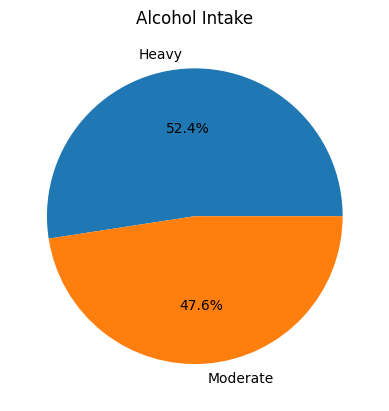

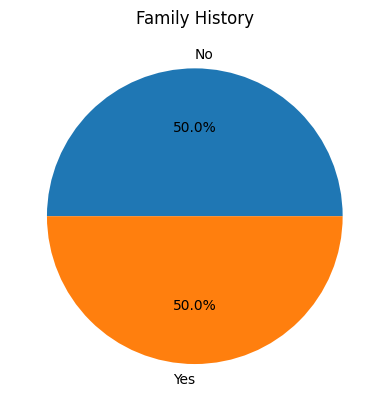

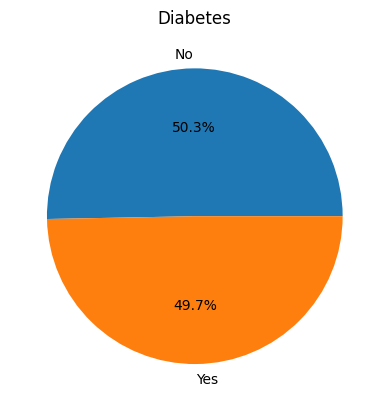

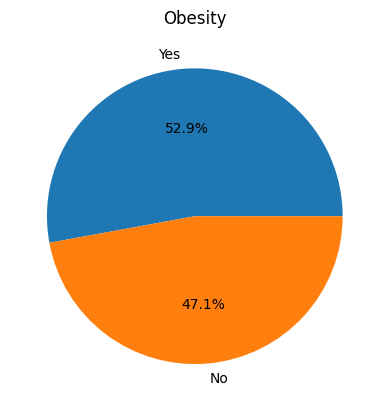

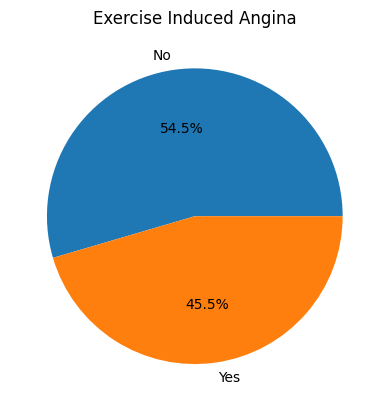

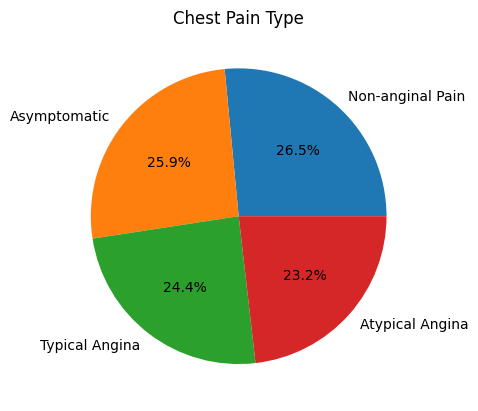

In [ ]:
for i in categorical_features:
    counts=df[i].value_counts()
    labels=counts.index
    sizes=counts.values
    plt.pie(sizes,labels=labels,autopct='%1.1f%%')
    plt.title(i)
    plt.show()
    

In [ ]:
categorical_features

['Gender',
 'Smoking',
 'Alcohol Intake',
 'Family History',
 'Diabetes',
 'Obesity',
 'Exercise Induced Angina',
 'Chest Pain Type']

In [ ]:
#changing categorical columns to numerical columns
df['Gender']=df['Gender'].map({"Male":1,"Female":2})
df['Smoking']=df['Smoking'].map({'Current':1,'Never':2,'Former':3})
df['Alcohol Intake']=df['Alcohol Intake'].map({'Heavy':1,'Moderate':2})
df['Family History']=df['Family History'].map({'No':0,'Yes':1})
df['Diabetes']=df['Diabetes'].map({'No':0,'Yes':1})
df['Obesity']=df['Obesity'].map({'No':0,'Yes':1})
df['Exercise Induced Angina']=df['Exercise Induced Angina'].map({'No':0,'Yes':1})
df['Chest Pain Type']=df['Chest Pain Type'].map({'Atypical Angina':1,'Typical Angina':2,'Asymptomatic':3,'Non-anginal Pain':4})

In [ ]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,2,228,119,66,1,1,1,0,0,1,8,119,1,1,1
2,53,1,234,91,67,2,1,3,1,0,1,5,196,1,1,1
6,64,2,211,105,86,3,1,8,1,1,1,2,120,0,2,1
7,60,2,208,148,83,2,2,4,0,1,1,2,113,1,3,1
8,37,2,317,137,66,1,1,3,0,1,1,5,114,0,4,0
